In [18]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
data = pd.read_table('column_2C.dat', sep = ' ' ,names = ['pelvic_incidence numeric','pelvic_tilt numeric'
             ,'lumbar_lordosis_angle numeric','sacral_slope numeric',
              'pelvic_radius numeric','degree_spondylolisthesis numeric', 'class'])


In [20]:
data

,pelvic_incidence numeric,pelvic_tilt numeric,lumbar_lordosis_angle numeric,sacral_slope numeric,pelvic_radius numeric,degree_spondylolisthesis numeric,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [21]:
newdata = data.replace('AB',1).replace('NO',0)

In [22]:
newdata

,pelvic_incidence numeric,pelvic_tilt numeric,lumbar_lordosis_angle numeric,sacral_slope numeric,pelvic_radius numeric,degree_spondylolisthesis numeric,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


In [23]:
newdata.loc[:,'class']

0      1
1      1
2      1
3      1
4      1
      ..
305    0
306    0
307    0
308    0
309    0
Name: class, Length: 310, dtype: int64

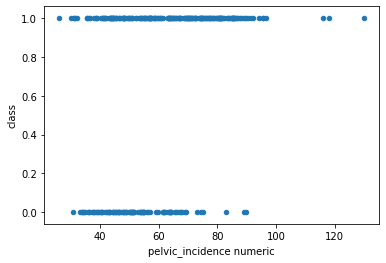

In [24]:
newdata.plot.scatter('pelvic_incidence numeric','class',marker='o')    # test plot



209
1  0   0


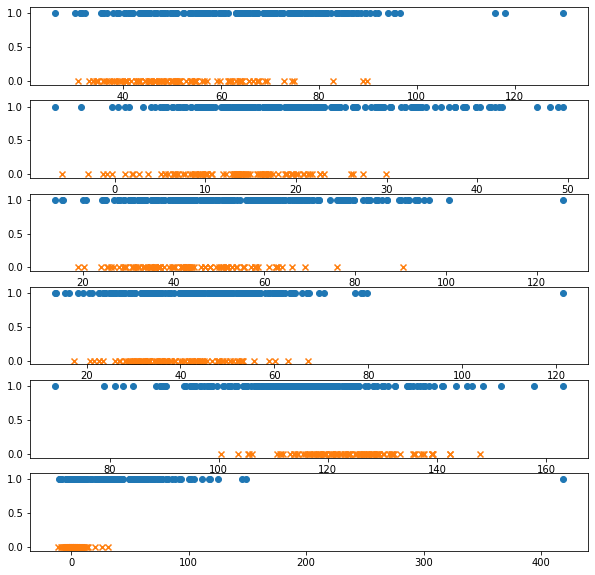

In [25]:
s = newdata.loc[:,'class']                                  # select class column
column_name = newdata.columns                               # extract column name
#the last one ends in 209 => i-1
# the first one starts with 210 => i

#print(f[0] + ' **** ' + f[1] + ' **** ' + f[-1])            # test column name
i=0
while s[i]!=0:
    i+=1              # find where 0 turn into 1
print(i-1)
print(str(s[i-1]) + "  " + str(s[i]) + "   " + str(s[i+1]) )
ax_list = [0]*6
fig, (ax_list[:]) = plt.subplots(6,figsize=(10,10))         # create subplot
for j in range(0,6):
    ab_x = newdata.loc[:i-1,column_name[j]]                # abnormal plot x
    ab_y = newdata.loc[:i-1,column_name[-1]]               # abnormal plot y
    nor_x = newdata.loc[i:,column_name[j]]                   # normal plot x
    nor_y = newdata.loc[i:,column_name[-1]]                  # normal plot y
    ax_list[j].scatter(ab_x, ab_y ,marker='o')
    ax_list[j].scatter(nor_x, nor_y, marker="x")



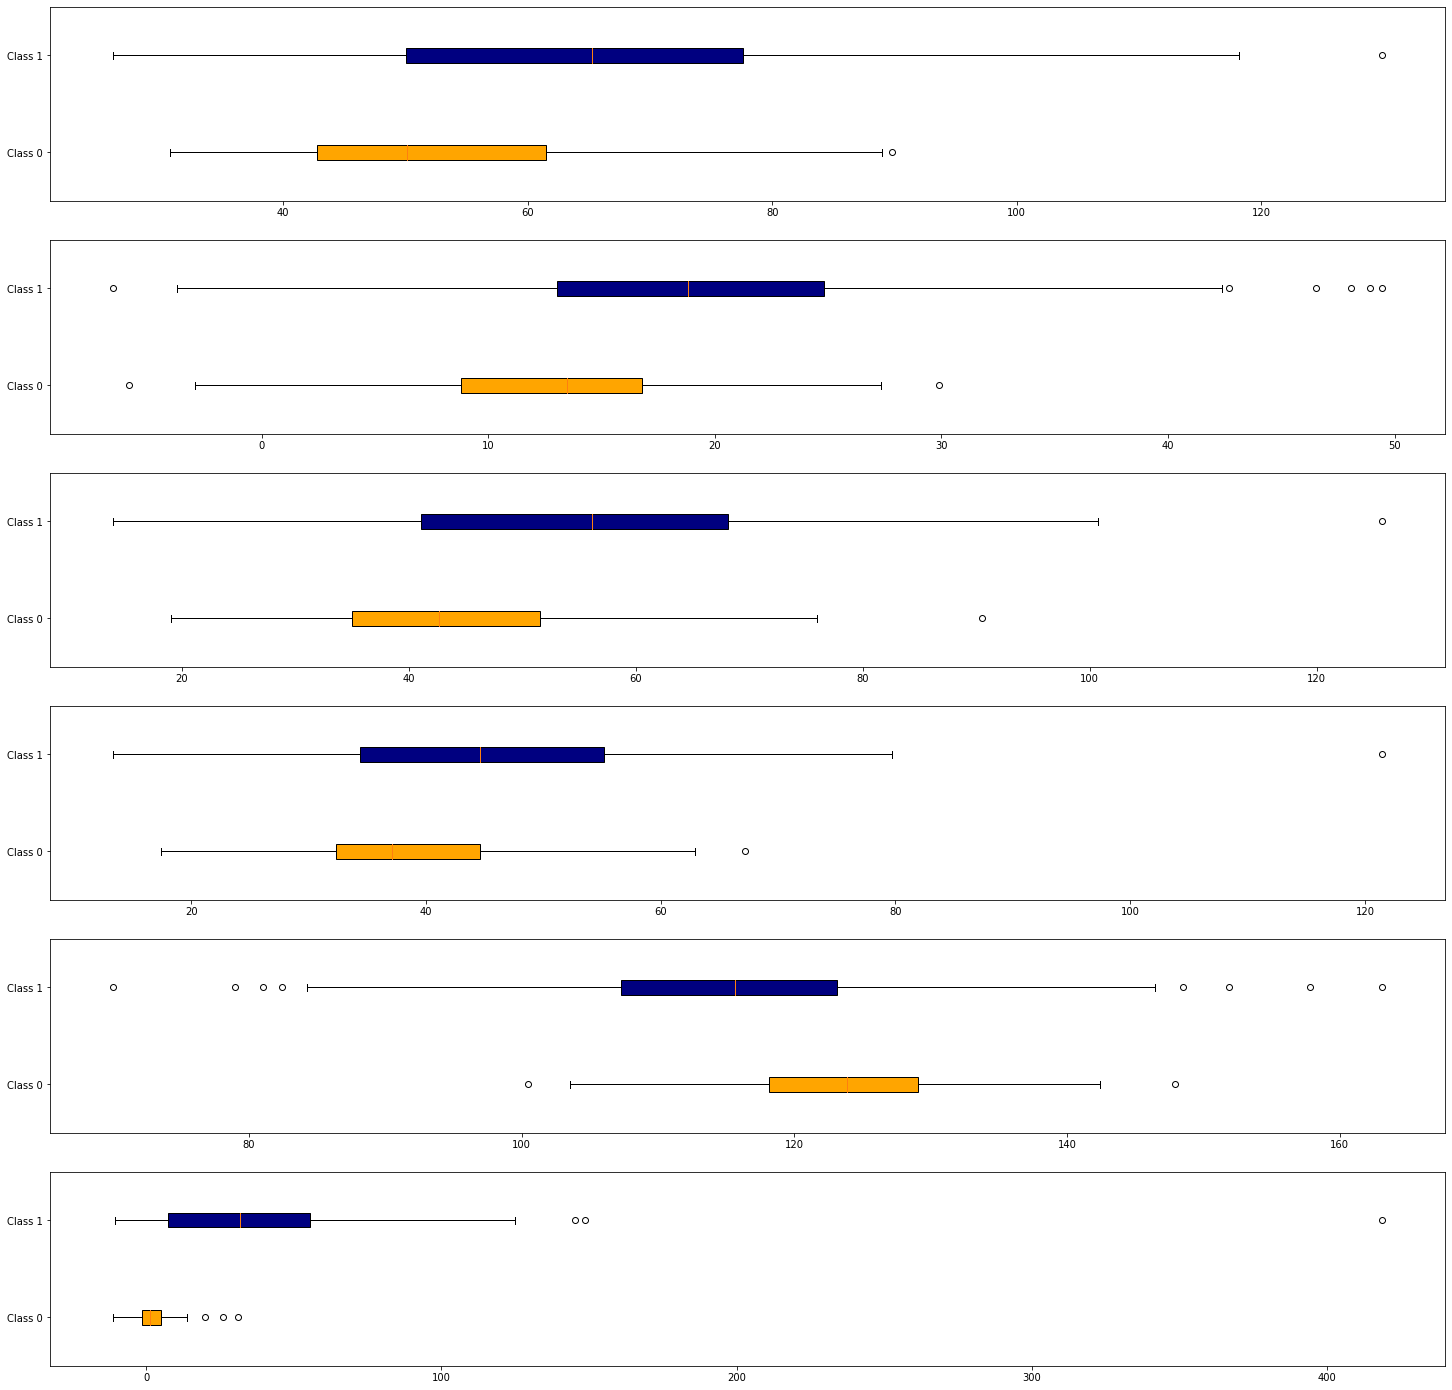

In [26]:
ax_list = [0]*6
fig, (ax_list[:]) = plt.subplots(6,figsize=(25,25))
for j in range(0,6):
    ab_x = newdata.loc[:i-1,column_name[j]]                # abnormal plot x
    ab_y = newdata.loc[:i-1,column_name[-1]]               # abnormal plot y
    nor_x = newdata.loc[i:,column_name[j]]                   # normal plot x
    nor_y = newdata.loc[i:,column_name[-1]]                  # normal plot y
    box_plot_data = [nor_x,ab_x]
    
    box = ax_list[j].boxplot(box_plot_data, vert=0, patch_artist=True, labels=['Class 0','Class 1'] )
    
    colors = ['orange', 'navy']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

In [27]:
training_set_C1 = newdata.loc[:139,:]
#print(newdata.loc[:3,:])
# C0 first 70 and first 140
# C1 
training_set_C0 = newdata.loc[i:i+69,:]
frame1 = [training_set_C1, training_set_C0]
training_set = pd.concat(frame1)
test_set_C1 = newdata.loc[140:i-1,:]
test_set_C0 = newdata.loc[i+70:309,:]
frame2 = [test_set_C1, test_set_C0]
test_set = pd.concat(frame2)

In [28]:
with pd.option_context("display.max_rows", 210):
    display(training_set)
#training_set5

,pelvic_incidence numeric,pelvic_tilt numeric,lumbar_lordosis_angle numeric,sacral_slope numeric,pelvic_radius numeric,degree_spondylolisthesis numeric,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
5,40.25,13.92,25.12,26.33,130.33,2.23,1
6,53.43,15.86,37.17,37.57,120.57,5.99,1
7,45.37,10.76,29.04,34.61,117.27,-10.68,1
8,43.79,13.53,42.69,30.26,125.00,13.29,1
9,36.69,5.01,41.95,31.68,84.24,0.66,1


In [29]:
with pd.option_context("display.max_rows", 210):
    display(test_set)

,pelvic_incidence numeric,pelvic_tilt numeric,lumbar_lordosis_angle numeric,sacral_slope numeric,pelvic_radius numeric,degree_spondylolisthesis numeric,class
140,69.56,15.40,74.44,54.16,105.07,29.70,1
141,89.50,48.90,72.00,40.60,134.63,118.35,1
142,85.29,18.28,100.74,67.01,110.66,58.88,1
143,60.63,20.60,64.54,40.03,117.23,104.86,1
144,60.04,14.31,58.04,45.73,105.13,30.41,1
145,85.64,42.69,78.75,42.95,105.14,42.89,1
146,85.58,30.46,78.23,55.12,114.87,68.38,1
147,55.08,-3.76,56.00,58.84,109.92,31.77,1
148,65.76,9.83,50.82,55.92,104.39,39.31,1
149,79.25,23.94,40.80,55.30,98.62,36.71,1


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)

In [32]:
# training_set.loc[:,'class']
trainx = [0]*6
testx = [0]*6
y_pred = [0]*6
y_pred_1 = [0]*6
#trainy = [0]*2
for i in range (0,6):
    trainx[i] = training_set.loc[:,column_name[i]]        # choose train column
    
    trainy= training_set.loc[:,column_name[-1]]           # choose train output
    # reshape   dataframe --> array
    trainx[i] = trainx[i].values.reshape(-1,1)            
    if i==0:
        print(str(trainy))
    # execute knn.fit()
    knn.fit(trainx[i],trainy)
    testx[i] = test_set.loc[:,column_name[i]]
    testx[i] = testx[i].values.reshape(-1,1)
    # knn.predict()
    y_pred[i] = knn.predict(testx[i])
    
    print( column_name[i] + " \n\n " + str(y_pred[i]) + "\n" )   
    

0      1
1      1
2      1
3      1
4      1
      ..
275    0
276    0
277    0
278    0
279    0
Name: class, Length: 210, dtype: int64
pelvic_incidence numeric 

 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1]

pelvic_tilt numeric 

 [1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1]

lumbar_lordosis_angle numeric 

 [1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1]

sacral_slope numeric 

 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

70   70
(70,)   (70,)
[2, 48, 55, 51, 56, 62, 60, 57, 60, 61, 59, 59, 59, 59, 57, 57, 57, 58, 58, 57, 59, 59, 60, 57, 60, 59, 57, 55, 56, 55, 56, 64, 63, 64, 65, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[23  9 18 14 13 12  8  9 11 10 12  7  7  7  7  7  7  7  7  7 10 10 10  7
  7  7  9  6  6  3  2  2  4  1  2  1  1  1  1  1  1  1  1  1  2  3 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30]


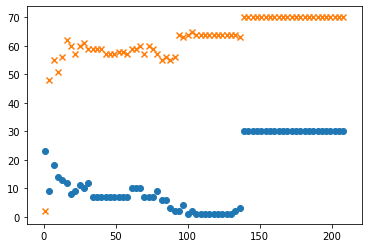

In [33]:
#from itertools import chain

k_x = []

k = 1
while k < 209:
    k_x.append(k)
    k = k+3

test_err = [0]*len(k_x)
train_err = [0]*len(k_x)

sum = 0

output_y_test = test_set.loc[:,column_name[6]]                 # choose test column 'class'
#output_y_test = output_y_test.values.reshape(-1,1)
output_y_train = training_set.loc[:,column_name[6]]            # choose train column 'class'
#output_y_train = output_y_train.values.reshape(-1,1)
for i in range(0,len(k_x)):
    knn = KNeighborsClassifier(n_neighbors = k_x[i])
    for j in range(0,6):
        knn.fit(trainx[j],trainy)                              # fit train x and  train y
        y_pred_1[j] = knn.predict(trainx[j])                   
        #y_pred_1[j] = y_pred_1[j].reshape(-1,1)
        
        train_err[i] =  np.sum(abs(output_y_train-y_pred_1[j]))       #
        
        y_pred[j] = knn.predict(testx[j])
        #y_pred[j] = y_pred[j].reshape(-1,1)
      
        # sum : test_err
        test_err[i] =   np.sum(abs(output_y_test-y_pred[j])) 


k_x = np.asarray(k_x)
#k_x = k_x.reshape(-1,1)


test_err = np.asarray(test_err)
print(str(len(test_err)) + "   " + str(len(k_x))    )
print( str((test_err.shape)) + "   " + str((k_x.shape))   )

plt.scatter(k_x,test_err, marker = 'o', label='$test Errors')
plt.scatter(k_x,train_err, marker = 'x', label = '$train errors')
print(train_err)
print(test_err)
TN_train = CM[0][0]
FN_train = CM[1][0]
TP_train = CM[1][1]
FP_train = CM[0][1]
    